In [35]:
# import the package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import plotly.graph_objects as go
from ipywidgets import widgets
import statsmodels.formula.api as smf
# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LinearRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
#normalized scaler
from sklearn.preprocessing import MinMaxScaler
#standardization scaler
from sklearn.preprocessing import StandardScaler

In [36]:
# load in csv
datascience_df = pd.read_csv("./data/ds_salaries.csv")
datascience_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [37]:
datascience_df.info() # dim = (607, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [38]:
datascience_df["work_year"] = datascience_df["work_year"].astype(str)
#datascience_df["remote_ratio "] = datascience_df["remote_ratio"].astype(str)
datascience_df["work_year2"] = datascience_df["work_year"].astype(float)

In [39]:
# check the NA in this data sets
datascience_df.isna().sum()
# the result shows there is no NA

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
work_year2            0
dtype: int64

In [40]:
# check the duplicatedb
sum(datascience_df.duplicated())

0

In [41]:
datascience_df_group = datascience_df.groupby("remote_ratio")

In [105]:
# work_year: the year the salary was paid
# experience_level: EN(entry-level); 
#                   MI(Junior MI mid-level); 
#                   SE(Intermediate SE Senior-level); 
#                   EX(Expert Ex Executice-level)
#                 ! Direct
# employment_type: PT Part-time 
#                  FT Full-time 
#                  CT Contract 
#                  FL Freelance
# job_title: the role worked in during the year !!!
#
#? salary_currency: The currency of the salary paid
# employee_residence: empolyees's primary country of residence in during the work year
# remote_ratio: 0 no remote 
#               50 partially remote (less than 20%)
#               100 fully remote (more than 80%)             

In [42]:
mycols = datascience_df.select_dtypes(include=object).columns.tolist()
summarytable = (pd.DataFrame(
    datascience_df[mycols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))
pd.set_option('display.max_rows', 191)
summarytable

counts
column             value                                           
company_location   IR                                             1
                   KE                                             1
                   EE                                             1
                   CL                                             1
                   MD                                             1
                   IQ                                             1
                   HN                                             1
                   IL                                             1
                   CO                                             1
                   IE                                             1
                   DZ                                             1
                   HR                                             1
                   HU                                             1
                   MT                                             1
                   AS                                             1
                   UA                                             1
                   MY                                             1
                   NZ                                             1
                   RO                                             1
                   SG                                             1
                   VN                                             1
                   SI                                             2
                   RU                                             2
                   IT                                             2
                   NG                                             2
                   BE                                             2
                   CH                                             2
                   CN                                             2
                   CZ                                             2
                   AE                                             3
                   PK                                             3
                   AU                                             3
                   MX                                             3
                   BR                                             3
                   LU                                             3
                   DK                                             3
                   TR                                             3
                   AT                                             4
                   PT                                             4
                   PL                                             4
                   NL                                             4
                   JP                                             6
                   GR                                            11
                   ES                                            14
                   FR                                            15
                   IN                                            24
                   DE                                            28
                   CA                                            30
                   GB                                            47
                   US                                           355
company_size       S                                             83
                   L                                            198
                   M                                            326
employee_residence LU                                             1
                   EE                                             1
                   HK                                             1
                   HN                                             1
                   HR                            

In [43]:
datascience_df.describe()

,Unnamed: 0,salary,salary_in_usd,remote_ratio,work_year2
count,607.000000,6.070000e+02,607.000000,607.00000,607.000000
mean,303.000000,3.240001e+05,112297.869852,70.92257,2021.405272
std,175.370085,1.544357e+06,70957.259411,40.70913,0.692133
min,0.000000,4.000000e+03,2859.000000,0.00000,2020.000000
25%,151.500000,7.000000e+04,62726.000000,50.00000,2021.000000
50%,303.000000,1.150000e+05,101570.000000,100.00000,2022.000000
75%,454.500000,1.650000e+05,150000.000000,100.00000,2022.000000
max,606.000000,3.040000e+07,600000.000000,100.00000,2022.000000


### Q1：How does a data scientist's experience level impact their salary? 
 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

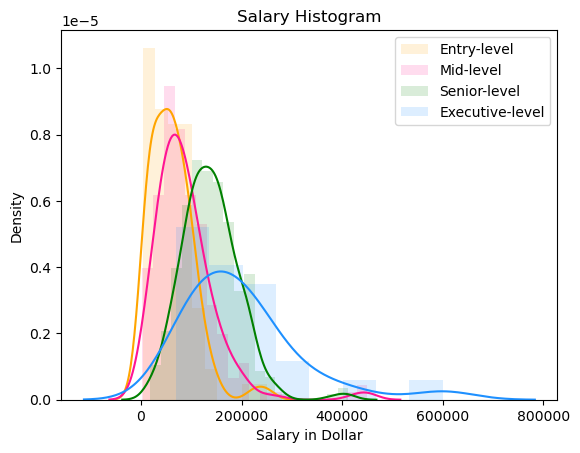

In [44]:

# experience_level: EN(entry-level); 
#                   MI(Junior MI mid-level); 
#                   SE(Intermediate SE Senior-level); 
#                   EX(Expert Ex Executice-level)



# datascience_df.hist(column = ["salary_in_usd","remote_ratio"])
# plt.show()

# plot histogram and density
# sns.distplot(a=datascience_df["salary_in_usd"],
#             hist_kws={"edgecolor": 'white'})
# plt.show()


#df = sns.load_dataset('iris')
#plt.subplots(figsize=(7,6), dpi=100)

sns.distplot( datascience_df.loc[datascience_df.experience_level=='EN', "salary_in_usd"] , color="orange", label="Entry-level",
             #bins=[-100000,0,100000,200000,300000,400000,500000,600000,700000,800000],
             hist_kws={'alpha' : 0.15}
            )
sns.distplot( datascience_df.loc[datascience_df.experience_level=='MI', "salary_in_usd"] , color="deeppink", label="Mid-level",
             #bins=[-100000,0,100000,200000,300000,400000,500000,600000,700000,800000],
             hist_kws={'alpha' : 0.15}
            )
sns.distplot( datascience_df.loc[datascience_df.experience_level=='SE', "salary_in_usd"] , color="green", label="Senior-level",
             #bins=[-100000,0,100000,200000,300000,400000,500000,600000,700000,800000],
             hist_kws={'alpha' : 0.15
                      }
            )
sns.distplot( datascience_df.loc[datascience_df.experience_level=='EX', "salary_in_usd"] , color="dodgerblue", label="Executive-level",
             #bins=[-100000,0,100000,200000,300000,400000,500000,600000,700000,800000],
             hist_kws={'alpha' : 0.15}
            )

plt.title('Salary Histogram')
plt.xlabel("Salary in Dollar")
plt.legend();




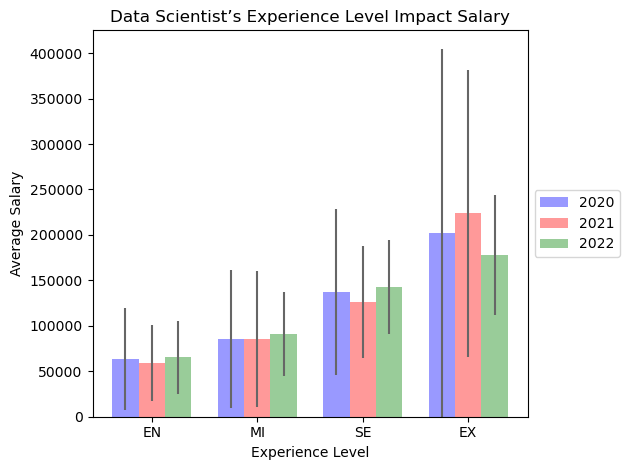

In [45]:
# experience_level: EN(entry-level); 
#                   MI(Junior MI mid-level); 
#                   SE(Intermediate SE Senior-level); 
#                   EX(Expert Ex Executice-level)


# how does a data scientist's experience level impact their salary?
group_year_experience = datascience_df.groupby(["work_year",'experience_level'])
year_experience_data1 = pd.DataFrame(group_year_experience["salary_in_usd"].mean())
year_experience_data2 = pd.DataFrame(group_year_experience["salary_in_usd"].std())
average_salary = year_experience_data1["salary_in_usd"]
std_salary = year_experience_data2["salary_in_usd"]
average_salary

import numpy as np
import matplotlib.pyplot as plt

n_groups = 4

means_2020 = (average_salary[0], average_salary[2], average_salary[3], average_salary[1])
std_2020 = (std_salary[0] , std_salary[2], std_salary[3], average_salary[1])
means_2021 = (average_salary[4], average_salary[6], average_salary[7], average_salary[5])
std_2021 = (std_salary[4], std_salary[6], std_salary[7], std_salary[5])
means_2022 = (average_salary[8] , average_salary[10], average_salary[11], average_salary[9])
std_2022 = (std_salary[8] , std_salary[10], std_salary[11], std_salary[9])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.4'}

rects1 = plt.bar(index, means_2020, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_2020,
                 error_kw=error_config,
                 label='2020')

rects2 = plt.bar(index + bar_width, means_2021, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_2021,
                 error_kw=error_config,
                 label='2021')

rects3 = plt.bar(index + 2*bar_width, means_2022, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=std_2022,
                 error_kw=error_config,
                 label='2022')

plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Data Scientist’s Experience Level Impact Salary')
plt.xticks(index + bar_width, ('EN', 'MI', 'SE', 'EX'))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Word Cloud

10475
There are 10475 words in the combination of all cells in column job title.


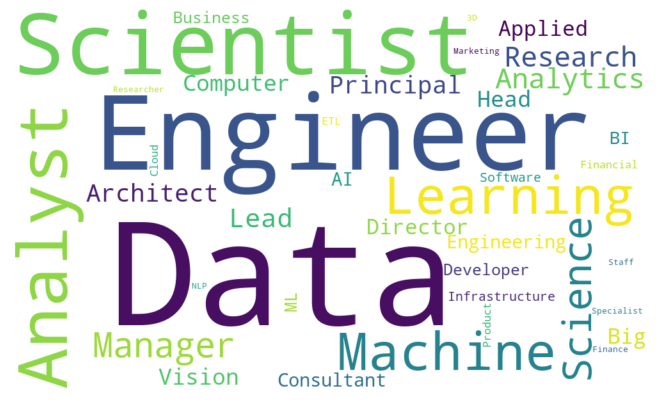

In [46]:
#word cloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(review for review in datascience_df.job_title.astype(str))
print(len(text))
print ("There are {} words in the combination of all cells in column job title.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=600,collocations=False).generate(text)
plt.axis("off")
#plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
# save the results
#wordcloud.to_file("img/first_review.png")


### Q2： Is remote work more rewarding for entry level or senior level data scientists?


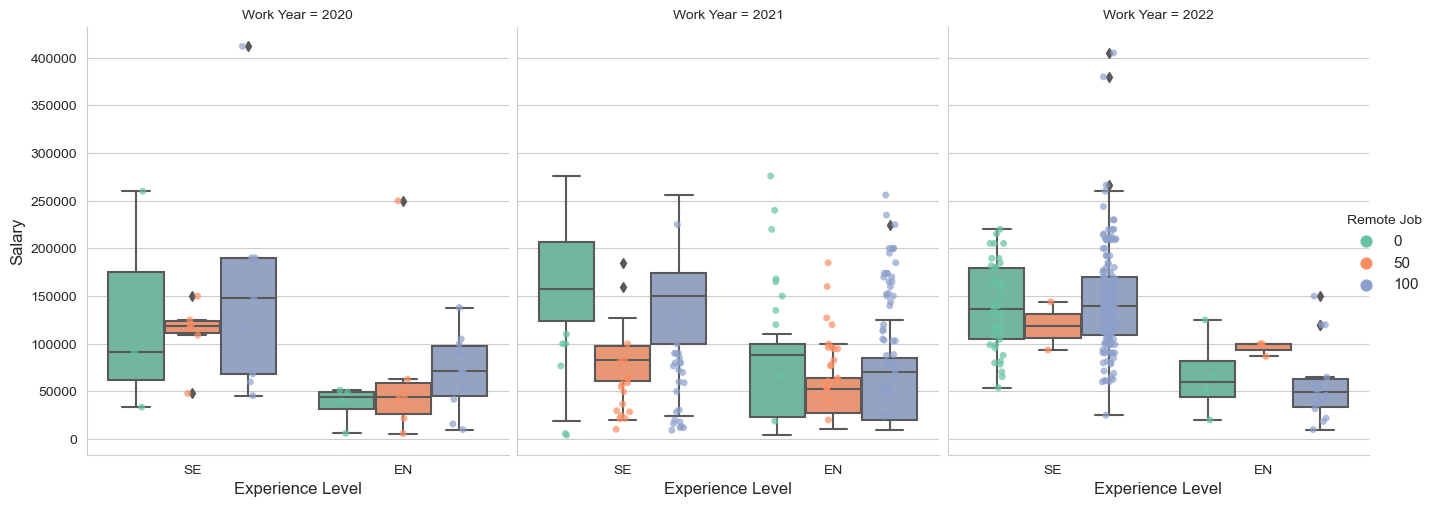

In [111]:
new_datascience_df = datascience_df.loc[(datascience_df['experience_level'] == "EN") | (datascience_df['experience_level'] == "SE"),:]
new_datascience_df = new_datascience_df.rename(columns={'work_year': 'Work Year'})

# box plot
grped_bplot = sns.catplot(x='experience_level', 
                          y='salary_in_usd',
                          hue="remote_ratio",
                          #order=["EN", "SE"],
                          kind="box",
                          legend=False,
                          height=6, 
                          aspect=1.3,
                          palette="Set2",
                          col = "Work Year",
                          data=new_datascience_df);


# jitter plot
grped_bplot.map_dataframe(sns.stripplot,
                x='experience_level',
                y='salary_in_usd',
                hue='remote_ratio',
                jitter=True,
                #legend=False,
                dodge=True,
                marker='o',
                palette="Set2",
                data = new_datascience_df,
                alpha=0.7)
grped_bplot.add_legend(title='Remote Job',fontsize=11)



grped_bplot.set_xlabels('Experience Level', fontsize=12) 
grped_bplot.set_ylabels('Salary', fontsize=12)

grped_bplot.fig.set_size_inches(14,5)
plt.show()



#plt.savefig("grouped_boxplot_with_jittered_data_points_Seaborn_Python.png")


### Interactivate Bar Graph

In [47]:
new_datascience_df = datascience_df.loc[(datascience_df['experience_level'] == "EN") | (datascience_df['experience_level'] == "SE"),:]
new_datascience_df
count = new_datascience_df.groupby(['experience_level'])["experience_level"].count()

x_axis = count.index.values.tolist()
y_axis = [count[0],count[1]]


In [48]:
# year = widgets.Dropdown(
#     value="2020",
#     options=new_datascience_df['work_year'].unique().tolist(),
#     description='Year:'
# )

# use_date = widgets.Checkbox(
#     description='Date: ',
#     value=True,
# )
# container = widgets.HBox(children=[year])

textbox = widgets.Dropdown(
    description='Job Title:   ',
    value='Machine Learning Scientist',
    options=new_datascience_df['job_title'].unique().tolist()
)

origin = widgets.Dropdown(
    options=new_datascience_df['remote_ratio'].unique().tolist(),
    value=0,
    description='Remote:'
)

# # Assign an empty figure widget with two traces
trace1 = go.Bar(y = new_datascience_df.groupby(['experience_level'])["experience_level"].count(),
                x = new_datascience_df.groupby(['experience_level'])["experience_level"].count().index.values.tolist(), opacity=0.75, name='Experience')

g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Entry-level vs Senior-level'
                        ),
                        barmode='overlay'
                    ))



In [114]:
def validate():
    if origin.value in new_datascience_df['remote_ratio'].unique() and textbox.value in new_datascience_df['job_title'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
            
#         filter_list = [i and j and k for i, j, k in
#                        zip(new_datascience_df['work_year'] == year.value, new_datascience_df['job_title'] == textbox.value,
#                        new_datascience_df['remote_ratio'] == origin.value)]

        filter_list = [i and j for i, j in
                       zip(new_datascience_df['job_title'] == textbox.value,
                       new_datascience_df['remote_ratio'] == origin.value)]

        temp_df = new_datascience_df[filter_list]
        x1 = temp_df.groupby(['experience_level'])["experience_level"].count().index.values.tolist()
        y1 = temp_df.groupby(['experience_level'])["experience_level"].count()
        with g.batch_update():
            g.data[0].x = x1
            g.data[0].y = y1
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Job Experience'
            g.layout.yaxis.title = 'Number of People'


origin.observe(response, names="value")
textbox.observe(response, names="value")
#year.observe(response, names="value")



container2 = widgets.HBox([origin, textbox])
widgets.VBox([container2,
              g])

### Multiple Linear Regression
### Prediction




In [49]:
datascience_df["remote_ratio2"] = datascience_df["remote_ratio"].astype(str)

In [52]:
# create the dummy coding (Degree and Gender)
datascience_df_dummy =pd.get_dummies(datascience_df,columns = ["experience_level","employment_type","company_size","remote_ratio2"])
datascience_df_dummy = datascience_df_dummy.loc[:, ~datascience_df_dummy.columns.str.contains('^Unnamed')]

datascience_df_dummy.head()

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,work_year2,experience_level_EN,...,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S,remote_ratio2_0,remote_ratio2_100,remote_ratio2_50
0,2020,Data Scientist,70000,EUR,79833,DE,0,DE,2020.0,0,...,0,0,1,0,1,0,0,1,0,0
1,2020,Machine Learning Scientist,260000,USD,260000,JP,0,JP,2020.0,0,...,0,0,1,0,0,0,1,1,0,0
2,2020,Big Data Engineer,85000,GBP,109024,GB,50,GB,2020.0,0,...,0,0,1,0,0,1,0,0,0,1
3,2020,Product Data Analyst,20000,USD,20000,HN,0,HN,2020.0,0,...,0,0,1,0,0,0,1,1,0,0
4,2020,Machine Learning Engineer,150000,USD,150000,US,50,US,2020.0,0,...,0,0,1,0,1,0,0,0,0,1


In [53]:
# cross validationwork_year2
# define x variable and y variable(target)
X = datascience_df_dummy.drop(['work_year','job_title','salary','salary_currency','salary_in_usd','employee_residence','company_location','company_location','work_year2','remote_ratio'],axis = 1)
Y = datascience_df_dummy['salary_in_usd']

#splitting Train and Test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# normalized and standardization
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test = n_scaler.transform(X_test.astype(np.float))

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))
print(len(X_test))

201


/var/folders/cl/3078jkyx5kq_gw3nfjk3j9tw0000gn/T/ipykernel_47071/4039128934.py:11: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/var/folders/cl/3078jkyx5kq_gw3nfjk3j9tw0000gn/T/ipykernel_47071/4039128934.py:12: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/var/folders/cl/3078jkyx5kq_gw3nfjk3j9tw0000gn/T/ipykernel_47071/4039128934.py:15:

In [54]:
# multiple linear regression 
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

# predict test result
Y_pred = regressor.predict(X_test)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

# #checking accuracy of Model
# print('Linear Regression Model:')
# print("Train Score {:.2f}".format(regressor.score(X_train,Y_train)))
# print("Train Score {:.2f}".format(regressor.score(X_test, Y_test)))

110752.87804632618
[-4.18691555e+17 -2.60827098e+17 -5.78371869e+17 -5.99683413e+17
 -1.57769214e+18 -3.14367595e+18 -4.93335471e+18 -3.51036227e+18
 -6.21097819e+18 -6.56865250e+18 -4.36925850e+18 -1.47560043e+18
 -1.78112876e+18 -1.39617841e+18]


,Coefficient
experience_level_EN,-4.186916e+17
experience_level_EX,-2.608271e+17
experience_level_MI,-5.783719e+17
experience_level_SE,-5.996834e+17
employment_type_CT,-1.577692e+18
employment_type_FL,-3.143676e+18
employment_type_FT,-4.933355e+18
employment_type_PT,-3.510362e+18
company_size_L,-6.210978e+18
company_size_M,-6.568653e+18


In [55]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual Salary': Y_test, 'Predicted Salary': Y_pred})
df["Difference"] = df["Predicted Salary"] - df["Actual Salary"]
df.head(5)
df2 = df.reset_index()
df.head(5)

,Actual Salary,Predicted Salary,Difference
575,140000,133152.878046,-6847.121954
52,45896,38432.878046,-7463.121954
530,85000,100512.878046,15512.878046
345,156600,133152.878046,-23447.121954
55,148261,133152.878046,-15108.121954


In [56]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 46656.13542008015
MSE: 4781921955.914436
RMSE: 69151.44218246237


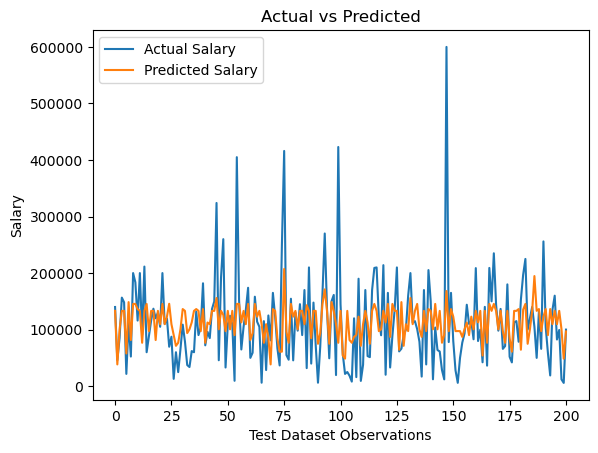

In [57]:
#Plot a line graph
plt.plot(df2["Actual Salary"], label='Actual Salary')
plt.plot(df2["Predicted Salary"], label='Predicted Salary')

# Add labels and title
plt.title("Actual vs Predicted")
plt.xlabel("Test Dataset Observations")
plt.ylabel("Salary")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.



Text(0.5, 0, 'Prediction Error')

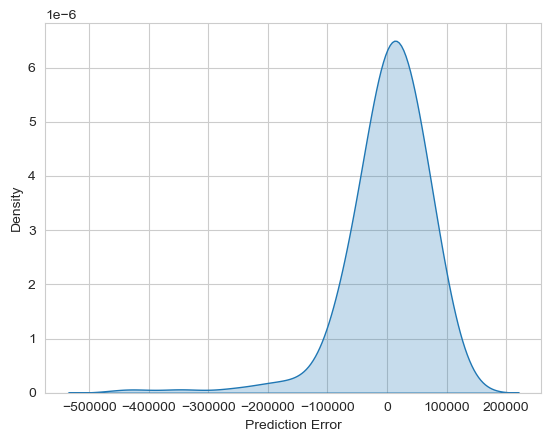

In [58]:
# desity plot for difference
sns.set_style('whitegrid')
sns.kdeplot(np.array(df2["Difference"]), shade=True, bw=0.5)
plt.xlabel('Prediction Error', fontsize=10)

### Inference

In [59]:
# statiscal inference
mod = smf.ols(formula = 'salary_in_usd ~ experience_level + employment_type +remote_ratio2 + company_size',data = datascience_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     25.22
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           5.93e-40
Time:                        16:37:18   Log-Likelihood:                -7533.8
No. Observations:                 607   AIC:                         1.509e+04
Df Residuals:                     596   BIC:                         1.514e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.46

### interaction model

In [60]:
# statiscal inference
mod2 = smf.ols(formula = 'salary_in_usd ~ experience_level * company_size',data = datascience_df)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     20.11
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.15e-34
Time:                        16:37:20   Log-Likelihood:                -7545.0
No. Observations:                 607   AIC:                         1.511e+04
Df Residuals:                     595   BIC:                         1.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------